# **Sentiment Analysis for Amazon Reviews**

In this project, we study the correlation between Amazon's product reviews and the rating of the products given by the customers. 

We use Natural Language Processing(NLP) to predict whether the sentiment of review is positive or average or negative.

Both traditional machine learning algorithms including Bernoulli Naive Bayes,  Multinomial Naive Bayesian(MNB), Logistic regression method and deep neural networks using such as Long Short Term Memory (LSTM) is used. 

We also use gloVe input features with dropout to obtain results.

By comparing these results, we get a good understanding of the these algorithms.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b50dtxt/glove.6B.50d.txt
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Read the dataset


In [3]:
data = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
data = data[['reviews.rating' , 'reviews.text']]
data=data.dropna()
data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


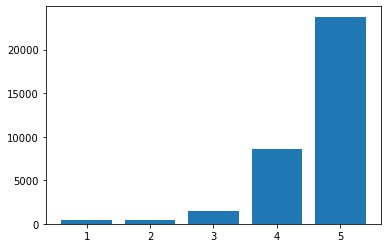

In [6]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

Due to the imbalance of our dataset, we try to add in more datas to reduce overfitting.

We add files such that we include rows with reviews lesser than 4 inorder to balance the dataset.

In [7]:
data2 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.rating' , 'reviews.text']]
data2 = data2[data2["reviews.rating"]<=3]

data3 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.rating' , 'reviews.text']]
data3 = data3[data3["reviews.rating"]<=3]

frames = [data, data2, data3]
df = pd.concat(frames)
df = df.dropna()

# We have 3 classifications.
1. BAD (0) for star rating 1 and 2.
2. AVERAGE (1) for star rating 3.
3. EXCELLENT (2) for star rating 4 and 5.

In [8]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

df["sentiment"] = df["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
df = df.dropna(subset=["sentiment"])
df["sentiment"]  = df["sentiment"] .astype(int)

# Preprocessing the data

Applying various NLP techniques - tokenize and remove all the puncuations and uneseccary jargons.

In [9]:
df["reviews.text"]=df["reviews.text"].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
df["reviews.text"]=df["reviews.text"].str.lower()
#tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df["reviews.text"].str.split()

stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

df['cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
df['cleaned'].head()

0    product far disappoint children love use like ...
1       great beginn experienc person bought gift love
2    inexpens tablet use learn step nabi thrill lea...
3    fire hd two week love tablet great valu prime ...
4    bought grand daughter come visit set user ente...
Name: cleaned, dtype: object

Vectorizing the array.

In [10]:
vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(df['cleaned']).toarray()
texts=pd.DataFrame(text)

Splitting the data into training and testing set.

In [11]:
y=df["sentiment"].values
X=pd.DataFrame(texts)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=5, max_iter=1000, random_state=0, solver='liblinear',
                   verbose=1)

In [13]:
print('Train accuracy :', (lr.score(X_train, y_train))*100)
print('Test accuracy :', (lr.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, lr.predict(X_test)))

Train accuracy : 93.46277459328716
Test accuracy : 90.88258680095414

 CONFUSION MATRIX
[[ 324   45  148]
 [  56  207  326]
 [  29   84 6327]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       517
           1       0.62      0.35      0.45       589
           2       0.93      0.98      0.96      6440

    accuracy                           0.91      7546
   macro avg       0.78      0.65      0.70      7546
weighted avg       0.90      0.91      0.90      7546



# Multinomial Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [15]:
print('Train accuracy :', (nb.score(X_train, y_train))*100)
print('Test accuracy :', (nb.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, nb.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy : 87.65448460952254
Test accuracy : 87.0924993373973

 CONFUSION MATRIX
[[ 129    4  384]
 [  29    7  553]
 [   2    2 6436]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.25      0.38       517
           1       0.54      0.01      0.02       589
           2       0.87      1.00      0.93      6440

    accuracy                           0.87      7546
   macro avg       0.74      0.42      0.45      7546
weighted avg       0.84      0.87      0.82      7546



# Bernoulli Naive Bayes

In [16]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(X_train,y_train)

BernoulliNB()

In [17]:
print('Train accuracy :', (dt.score(X_train, y_train))*100)
print('Test accuracy :', (dt.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(X_test)))

Train accuracy : 87.93611875020709
Test accuracy : 86.46965279618341

 CONFUSION MATRIX
[[ 248   34  235]
 [  62  136  391]
 [  99  200 6141]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.61      0.48      0.54       517
           1       0.37      0.23      0.28       589
           2       0.91      0.95      0.93      6440

    accuracy                           0.86      7546
   macro avg       0.63      0.55      0.58      7546
weighted avg       0.84      0.86      0.85      7546



# Using RNN - Long Short Term Memory(LSTM)

In [18]:
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM, Bidirectional
from keras.layers import GlobalMaxPooling1D

Tokenizer is done to vectorize a text corpus, by turning each text into either a sequence of integers or into a vector.
And then we split it to train and test sets.

In [19]:
token = Tokenizer()
token.fit_on_texts(df["reviews.text"])
word_index = token.word_index
max_len = 120
X_train, X_test, y_train, y_test = train_test_split(df["reviews.text"], df["sentiment"], test_size=0.25, random_state=42)

1.Converting Text to Sequence

2.Padding to ensure that all sequences in a list have the same length.

In [20]:
X_train = token.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding = "post",truncating = "post")

X_test = token.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, padding = "post", truncating = "post")

y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

len(y_test),len(X_test),len(X_train),len(y_train)

(9432, 9432, 28295, 28295)

**Model**

In [21]:
vocab_size = len(word_index)+1
embedding_dim = 16
optimizer = Adam(lr=0.0001, decay=0.0001)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim , input_length=max_len))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           225696    
_________________________________________________________________
lstm (LSTM)                  (None, 120, 150)          100200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 100)               15100     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 521,899
Trainable params: 521,899
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=16, epochs=8)

Epoch 1/8
1769/1769 [==============================] - 29s 16ms/step - loss: 0.3136 - accuracy: 0.8562
Epoch 2/8
1769/1769 [==============================] - 29s 17ms/step - loss: 0.3060 - accuracy: 0.8574
Epoch 3/8
1769/1769 [==============================] - 29s 16ms/step - loss: 0.3080 - accuracy: 0.8577
Epoch 4/8
1769/1769 [==============================] - 30s 17ms/step - loss: 0.3079 - accuracy: 0.8577
Epoch 5/8
1769/1769 [==============================] - 29s 16ms/step - loss: 0.3077 - accuracy: 0.8577
Epoch 6/8
1769/1769 [==============================] - 29s 17ms/step - loss: 0.3078 - accuracy: 0.8577
Epoch 7/8
1769/1769 [==============================] - 30s 17ms/step - loss: 0.3077 - accuracy: 0.8577
Epoch 8/8
1769/1769 [==============================] - 29s 17ms/step - loss: 0.3076 - accuracy: 0.8577


In [23]:
result = model.evaluate(X_train, y_train)
print( 'Train accuracy :' , result[1]*100)
result = model.evaluate(X_test,y_test)
print( 'Test accuracy :' , result[1]*100)

885/885 [==============================] - 6s 7ms/step - loss: 0.3074 - accuracy: 0.8577
Train accuracy : 85.76780557632446
295/295 [==============================] - 2s 8ms/step - loss: 0.3140 - accuracy: 0.8532
Test accuracy : 85.31594276428223


# Using GloVe

GloVe, coined from Global Vectors, is a model for distributed word representation. The model is an unsupervised learning algorithm for obtaining vector representations for words. This is achieved by mapping words into a meaningful space where the distance between words is related to semantic similarity

In [24]:
f = open('/kaggle/input/glove6b50dtxt/glove.6B.50d.txt',encoding="utf8")
embidx = {}
for line in f:
    val = line.split()
    word = val[0]
    coeff = np.asarray(val[1:],dtype = 'float')
    embidx[word] = coeff

f.close()

print('Found %s word vectors.' % len(embidx))

Found 400000 word vectors.


In [25]:
vocab_size=len(word_index)
embedding_dim = 50

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));

for word, i in word_index.items():
    embedding_vector = embidx.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

print(len(embeddings_matrix))

14106


In [26]:
embeddings_matrix.shape

(14106, 50)

In [27]:
embedd_layer = Embedding(vocab_size+1, embedding_dim, input_length=max_len, 
                         weights=[embeddings_matrix], trainable=False)

model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(64 , return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(150,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation="softmax"))
model.compile(loss = 'binary_crossentropy' , optimizer = Adam(lr = 0.01) , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 50)           705300    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          58880     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               19350     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 453       
Total params: 783,983
Trainable params: 78,683
Non-trainable params: 705,300
___________________________________________

In [30]:
hist = model.fit(X_train,y_train,epochs = 10 , batch_size = 512, validation_data = (X_test,y_test))

Epoch 1/10
56/56 [==============================] - 54s 961ms/step - loss: 0.1309 - accuracy: 0.9227 - val_loss: 0.1616 - val_accuracy: 0.9048
Epoch 2/10
56/56 [==============================] - 54s 972ms/step - loss: 0.1246 - accuracy: 0.9285 - val_loss: 0.1773 - val_accuracy: 0.9071
Epoch 3/10
56/56 [==============================] - 54s 959ms/step - loss: 0.1197 - accuracy: 0.9292 - val_loss: 0.1654 - val_accuracy: 0.9123
Epoch 4/10
56/56 [==============================] - 54s 963ms/step - loss: 0.1121 - accuracy: 0.9352 - val_loss: 0.1693 - val_accuracy: 0.9132
Epoch 5/10
56/56 [==============================] - 54s 959ms/step - loss: 0.1113 - accuracy: 0.9344 - val_loss: 0.1627 - val_accuracy: 0.9098
Epoch 6/10
56/56 [==============================] - 53s 955ms/step - loss: 0.1023 - accuracy: 0.9417 - val_loss: 0.1714 - val_accuracy: 0.9070
Epoch 7/10
56/56 [==============================] - 53s 951ms/step - loss: 0.0982 - accuracy: 0.9424 - val_loss: 0.1730 - val_accuracy: 0.9116

In [31]:
result = model.evaluate(X_test,y_test)
print('Test accuracy :', result[1]*100)

295/295 [==============================] - 19s 65ms/step - loss: 0.1799 - accuracy: 0.9130
Test accuracy : 91.29558801651001


# Conclusion

We extracted the features of our dataset and built several supervised model based on that. 
These models not only include traditional algorithms such as naive bayes, logistic regression but also deep learning models such as Recurrent Neural Networks and Convolutional Neural networks. 

From the results, our highest accuracy on the test set is 91.3% when using LSTM with GloVe and dropout. 

One of the main reason the accuracy is not high enough is because of the data imbalance. 